In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt
%matplotlib inline

def showimage(img):
    plt.imshow(img,cmap='gray')
    plt.show()


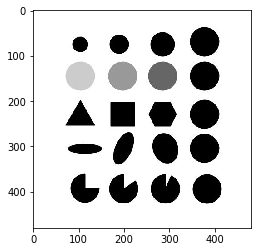

In [2]:
# image = cv2.imread('CTRL6.jpg')
# image = cv2.imread('blob.jpg')30-legos.jpg
# Read image
im = cv2.imread("blob.jpg", cv2.IMREAD_GRAYSCALE)
# gray = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)


showimage(im)


In [3]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# 设置  blobColor = 0可以选择较暗的blob，而  blobColor =  255可以用于较亮的 blob。
params.filterByColor=True
params.blobColor=0

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200


# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
    
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

In [4]:
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
	detector = cv2.SimpleBlobDetector(params)
else : 
	detector = cv2.SimpleBlobDetector_create(params)

In [ ]:
# Determine which openCV version were using
if cv2.__version__.startswith('2.'):
    detector = cv2.SimpleBlobDetector()
else:
    detector = cv2.SimpleBlobDetector_create()

In [5]:
# Detect blobs.
keypoints = detector.detect(im)

In [6]:
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

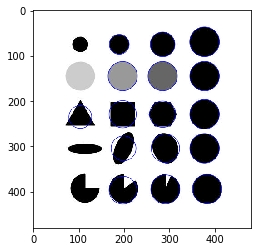

In [7]:
showimage(im_with_keypoints)

In [8]:
import ipywidgets
from IPython.display import display
from jetcam.utils import bgr8_to_jpeg

In [9]:
image_widget = ipywidgets.Image(format='jpeg')
image_widget.value = bgr8_to_jpeg(im_with_keypoints)
display(image_widget)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

In [10]:
print(len(keypoints))

16
